In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("../data/final_data.csv", decimal=".")

/tmp/ipykernel_124829/1437576453.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/final_data.csv", decimal=".")


In [3]:
df.describe()

,TASK_ID,HOURS,HOURLY_RATE,COST,QUALITY_EVALUATION
count,5.540290e+05,554029.000000,554029.000000,554029.000000,554029.000000
mean,1.067535e+07,2.342250,16.373515,37.883495,7.064479
std,3.299086e+05,6.743276,5.190844,121.788621,1.474791
min,1.004828e+07,0.000000,8.000000,0.000000,0.000000
25%,1.038542e+07,0.110000,13.000000,1.820000,6.000000
50%,1.068016e+07,0.490000,15.000000,7.310000,7.000000
75%,1.096631e+07,1.600000,17.000000,25.610000,8.000000
max,1.124191e+07,324.830000,62.000000,12275.600000,10.000000


<Axes: xlabel='TASK_TYPE'>

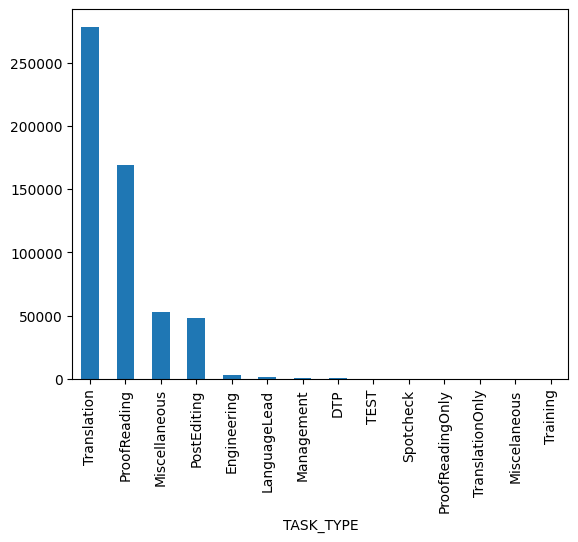

In [4]:
fig, ax = plt.subplots()
df['TASK_TYPE'].value_counts().plot(ax=ax, kind='bar')

<Axes: xlabel='TARGET_LANG'>

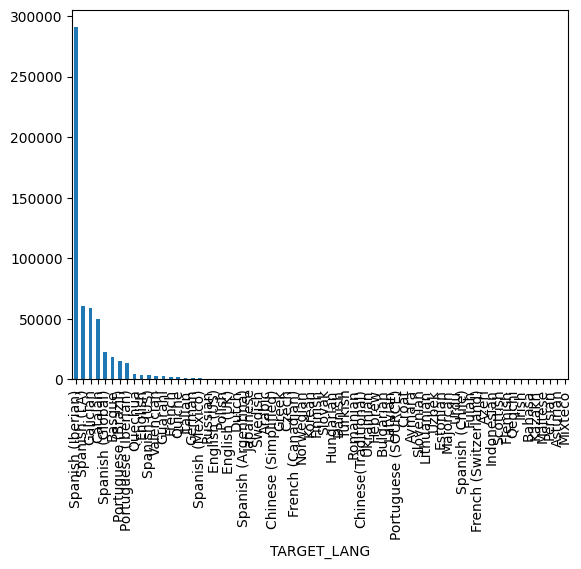

In [5]:
df['TARGET_LANG'].value_counts().plot(kind='bar')

<Axes: xlabel='SOURCE_LANG'>

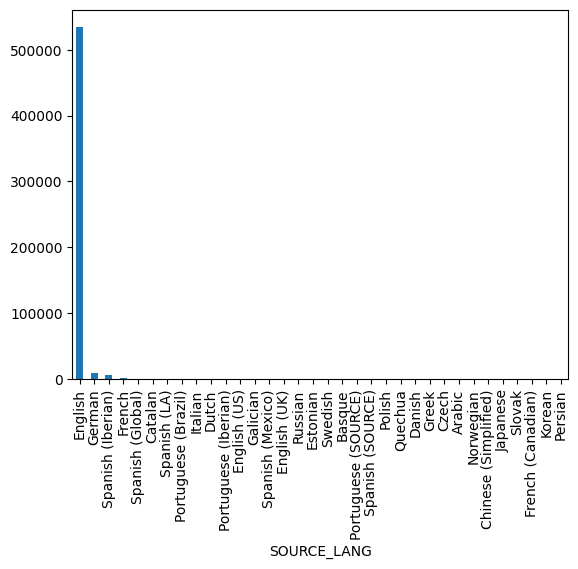

In [6]:
df['SOURCE_LANG'].value_counts().plot(kind='bar')

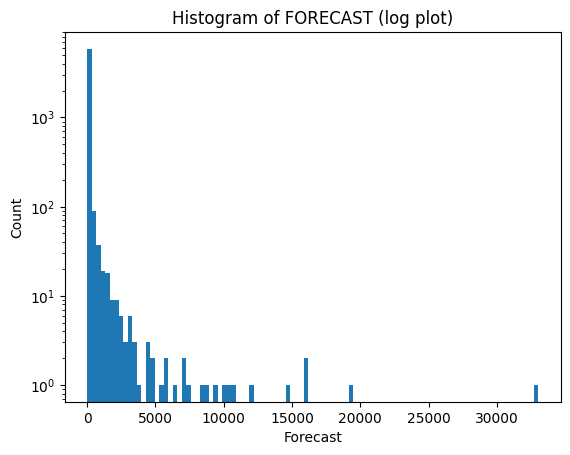

In [8]:
forecast_numbers = df['HOURS'].value_counts()
plt.hist(forecast_numbers, bins=100)
plt.yscale('log')
plt.title('Histogram of FORECAST (log plot)')
plt.ylabel('Count')
plt.xlabel('Forecast')
plt.show()

In [9]:
date_cols = ['READY', 'WORKING', 'DELIVERED', 'RECEIVED', 'CLOSE']
for col in date_cols:
    df[col] = df[col].str.replace(r"(\d{2})\.(\d{2})\.(\d{2})", r"\1:\2:\3", regex=True)
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [10]:
df['READY']

0        2013-10-31 13:18:25
1        2012-10-26 17:25:41
2        2015-09-09 17:34:56
3        2014-11-26 16:34:25
4        2013-10-31 13:17:56
                 ...        
554024   2022-11-10 13:37:17
554025   2022-11-10 12:56:57
554026   2022-11-16 15:11:56
554027   2022-11-22 09:59:01
554028   2022-09-01 17:11:20
Name: READY, Length: 554029, dtype: datetime64[ns]

In [11]:
df['_work_ready'] = df['WORKING'] - df['READY']
df['_work_ready'].describe()

count                       554029
mean     0 days 21:01:24.594893047
std      2 days 08:38:43.722627100
min                0 days 00:00:00
25%                0 days 00:43:37
50%                0 days 03:45:46
75%                0 days 21:19:07
max              351 days 22:51:51
Name: _work_ready, dtype: object

In [12]:
df['_time_taken'] = df['DELIVERED'] - df['WORKING']
df['_time_taken'].describe()

count                       554029
mean     0 days 20:31:58.715061846
std      3 days 12:01:34.180314866
min                0 days 00:00:01
25%                0 days 00:18:56
50%                0 days 01:17:55
75%                0 days 06:18:00
max              458 days 22:10:27
Name: _time_taken, dtype: object

In [13]:
df['_time_reception'] = df['RECEIVED'] - df['DELIVERED']
df['_time_reception'].describe()

count                       554029
mean     0 days 07:34:10.817892204
std      1 days 17:12:09.259500059
min              -1 days +06:39:54
25%                0 days 00:08:59
50%                0 days 00:40:42
75%                0 days 02:58:00
max              347 days 10:46:05
Name: _time_reception, dtype: object

In [14]:
df['_time_to_close'] = df['CLOSE'] - df['RECEIVED']
df['_time_to_close'].describe()

count                       554029
mean     0 days 02:44:44.455434643
std      2 days 05:28:55.650543704
min              -1 days +12:57:27
25%                0 days 00:00:00
50%                0 days 00:00:03
75%                0 days 00:00:42
max             1322 days 01:08:03
Name: _time_to_close, dtype: object

In [15]:
new_time_deltas = ['_work_ready', '_time_taken', '_time_reception', '_time_to_close']
for col in new_time_deltas:
    # express time in total hours
    df[col] = df[col].dt.total_seconds() / 3600

In [16]:
df.to_csv("../data/final_data_enhanced.csv", decimal=".")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554029 entries, 0 to 554028
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   PROJECT_ID                   554029 non-null  object        
 1   PM                           554029 non-null  object        
 2   TASK_ID                      554029 non-null  int64         
 3   START                        554029 non-null  object        
 4   END                          554029 non-null  object        
 5   TASK_TYPE                    554029 non-null  object        
 6   SOURCE_LANG                  554029 non-null  object        
 7   TARGET_LANG                  554029 non-null  object        
 8   TRANSLATOR                   554029 non-null  object        
 9   ASSIGNED                     554029 non-null  object        
 10  READY                        554029 non-null  datetime64[ns]
 11  WORKING                   

### Feature Scaling

In [18]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

df_numeric = df.select_dtypes(include=[np.number])
df_scaled = df_numeric.copy()


df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)
df_scaled.head()

,TASK_ID,HOURS,HOURLY_RATE,COST,QUALITY_EVALUATION,_work_ready,_time_taken,_time_reception,_time_to_close
0,-1.900720,-0.347346,-0.649898,-0.311060,-1.399846,-0.371132,-0.244358,-0.183705,-0.051323
1,-1.900720,0.112371,0.120691,0.121658,0.634342,1.261852,8.598491,-0.167302,-0.051338
2,-1.900720,-0.124902,-1.035192,-0.175579,1.312405,-0.370887,0.030659,-0.163197,-0.051328
3,-1.900720,-0.310272,0.120691,-0.276163,-0.043721,-0.371132,-0.229356,-0.183051,-0.051328
4,-1.900717,-0.347346,0.698632,-0.311060,-0.043721,-0.371132,-0.244348,-0.183698,-0.051328


In [19]:
from sklearn.preprocessing import LabelEncoder

# add the task_type
df_scaled['TASK_TYPE'] = df['TASK_TYPE']

le = LabelEncoder()
df_scaled['TASK_TYPE'] = le.fit_transform(df_scaled['TASK_TYPE'])
df_scaled

,TASK_ID,HOURS,HOURLY_RATE,COST,QUALITY_EVALUATION,_work_ready,_time_taken,_time_reception,_time_to_close,TASK_TYPE
0,-1.900720,-0.347346,-0.649898,-0.311060,-1.399846,-0.371132,-0.244358,-0.183705,-0.051323,5
1,-1.900720,0.112371,0.120691,0.121658,0.634342,1.261852,8.598491,-0.167302,-0.051338,5
2,-1.900720,-0.124902,-1.035192,-0.175579,1.312405,-0.370887,0.030659,-0.163197,-0.051328,1
3,-1.900720,-0.310272,0.120691,-0.276163,-0.043721,-0.371132,-0.229356,-0.183051,-0.051328,1
4,-1.900717,-0.347346,0.698632,-0.311060,-0.043721,-0.371132,-0.244348,-0.183698,-0.051328,3
...,...,...,...,...,...,...,...,...,...,...
554024,1.712717,-0.322136,-0.457251,-0.291518,-0.721783,-0.368205,-0.242404,-0.179775,-0.049936,7
554025,1.712720,-0.331034,-0.457251,-0.298415,-0.721783,-0.368518,-0.242616,-0.183442,-0.049962,7
554026,1.712726,-0.332517,-0.457251,-0.299564,1.312405,-0.367881,-0.241984,-0.174469,-0.049593,7
554027,1.712729,-0.332517,-0.457251,-0.299564,0.634342,-0.369445,-0.243042,-0.141434,-0.050315,7


## Dimensionality Reduction

In [22]:
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

In [23]:
def reduce_and_plot(df: pd.DataFrame, features: list[str]):
    """
    Performs dimensionality reduction using PCA and plots the results, 
    colored by TASK_TYPE.
    """
    # Select the features for dimensionality reduction
    X = df[features]
    
    # Perform PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Create a new DataFrame for the PCA results
    pca_df = pd.DataFrame(data=X_pca, columns=['principal component 1', 'principal component 2'])
    pca_df['TASK_TYPE'] = df['TASK_TYPE']
    
    # Plot the results
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='principal component 1', y='principal component 2', hue='TASK_TYPE', data=pca_df, alpha=0.7)
    plt.title('PCA of FORECAST, QUALITY_EVALUATION, and COST colored by TASK_TYPE')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

    return pca, pca_df

In [30]:

def reduce_and_plot_tsne(df):
    """
    Performs dimensionality reduction using t-SNE and plots the results,
    colored by TASK_TYPE.
    """
    features = ['HOURS', 'QUALITY_EVALUATION', 'COST']
    X = df[features]

    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE Dimension 1', 'TSNE Dimension 2'])
    tsne_df['TASK_TYPE'] = df['TASK_TYPE']

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='TSNE Dimension 1', y='TSNE Dimension 2', hue='TASK_TYPE', data=tsne_df, alpha=0.7)
    plt.title('t-SNE of FORECAST, QUALITY_EVALUATION, and COST colored by TASK_TYPE')
    plt.xlabel('TSNE Dimension 1')
    plt.ylabel('TSNE Dimension 2')
    plt.grid(True)
    plt.show()

def reduce_and_plot_umap(df):
    """
    Performs dimensionality reduction using UMAP and plots the results,
    colored by TASK_TYPE.
    """
    features = ['FORECAST', 'QUALITY_EVALUATION', 'COST']
    X = df[features]

    reducer = umap.UMAP(random_state=42)
    X_umap = reducer.fit_transform(X)

    umap_df = pd.DataFrame(data=X_umap, columns=['UMAP Dimension 1', 'UMAP Dimension 2'])
    umap_df['TASK_TYPE'] = df['TASK_TYPE']

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='UMAP Dimension 1', y='UMAP Dimension 2', hue='TASK_TYPE', data=umap_df, alpha=0.7)
    plt.title('UMAP of FORECAST, QUALITY_EVALUATION, and COST colored by TASK_TYPE')
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.grid(True)
    plt.show()

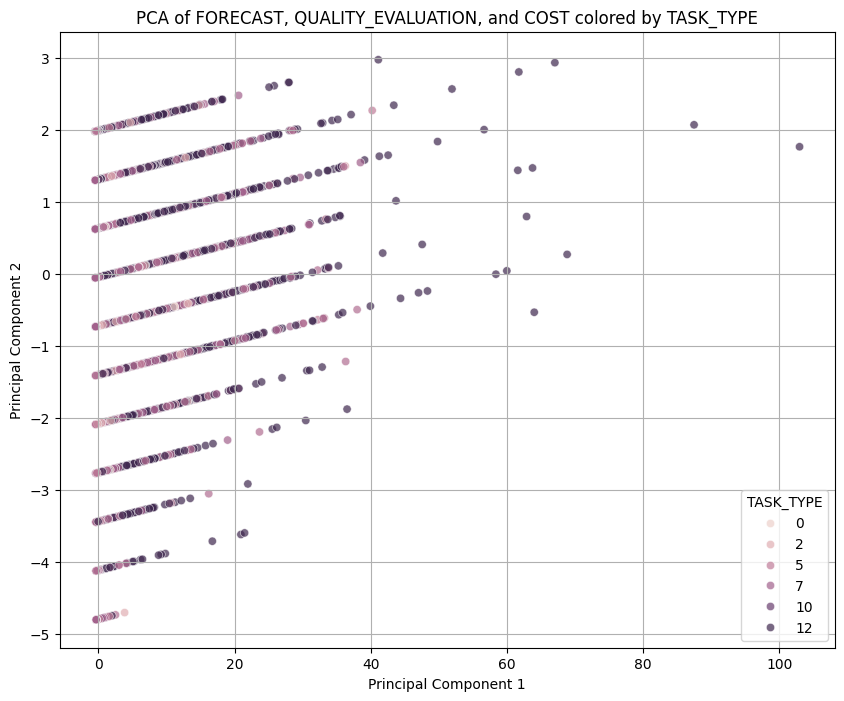

In [25]:
features = ['HOURS', 'QUALITY_EVALUATION', 'COST']
pca, pca_df = reduce_and_plot(df_scaled, features)

Figure out with it looks like this:

In [26]:
loadings = pca.components_

loadings_df = pd.DataFrame(loadings, columns=features, index=['PC1', 'PC2'])
loadings_df = loadings_df.transpose()
loadings_df

,PC1,PC2
HOURS,0.706914,0.016217
QUALITY_EVALUATION,-0.023816,0.999716
COST,0.706899,0.017465


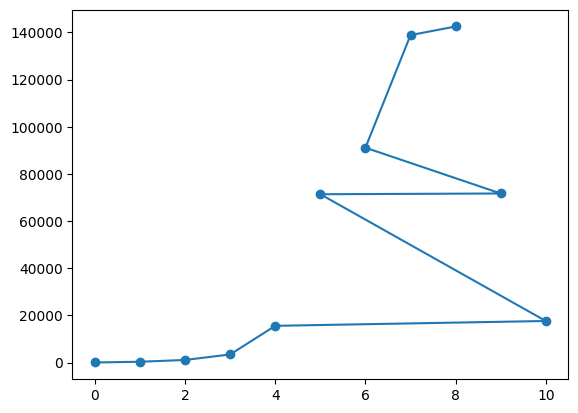

In [27]:
# original value counts for quality evaluation
df['QUALITY_EVALUATION'].value_counts()
plt.plot(df['QUALITY_EVALUATION'].value_counts(), marker='o')

In [28]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# --- Assume you have your pca_df DataFrame ---
# pca_df = pd.DataFrame(data=X_pca, columns=['principal component 1', 'principal component 2'])
# pca_df['TASK_TYPE'] = df['TASK_TYPE'] # Or QUALITY_EVALUATION if you added it
# ---------------------------------------------

n_lines = 11 # Set this based on your plot

pc2_values = pca_df[['principal component 2']].values # Needs to be a 2D array for sklearn

kmeans = KMeans(n_clusters=n_lines, random_state=42, n_init=10) # n_init='auto' in newer sklearn
kmeans.fit(pc2_values)
pca_df['line_cluster'] = 10 - kmeans.labels_

cluster_counts = pca_df['line_cluster'].value_counts().sort_index()

print(f"Number of points per identified line (using K-Means on PC2):")
print(cluster_counts)


Number of points per identified line (using K-Means on PC2):
line_cluster
0        455
1       5277
2       1143
3      15593
4      17759
5       3470
6      91137
7     137327
8      71324
9      71741
10    138803
Name: count, dtype: int64


They match!!! However there are some labels are switches (no problem, since this is to confirm the behaviour).

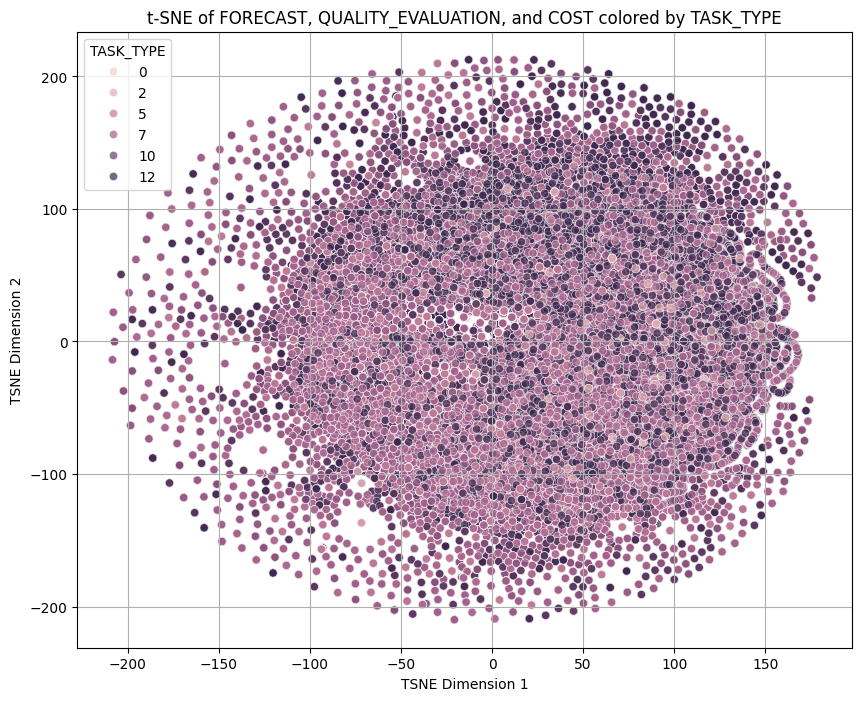

In [31]:
reduce_and_plot_tsne(df_scaled)

### Classifier for Quality Evaluation

In [32]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# --- Assuming 'df' is your original DataFrame ---
# Example structure (replace with your actual df loading)
# df = pd.read_csv('your_data.csv') 
# Make sure 'df' contains the original 'QUALITY_EVALUATION' column

# --- Your preprocessing code ---
scaler = preprocessing.StandardScaler()

# Ensure 'QUALITY_EVALUATION' is numeric if it isn't already
df['QUALITY_EVALUATION'] = pd.to_numeric(df['QUALITY_EVALUATION'], errors='coerce') 
# Drop rows where quality evaluation might be non-numeric if necessary
df.dropna(subset=['QUALITY_EVALUATION'], inplace=True) 
# Convert to integer type for classification target
df['QUALITY_EVALUATION'] = df['QUALITY_EVALUATION'].astype(int)

# Select only numeric types *from the original df* for scaling
df_numeric = df.select_dtypes(include=[np.number])

y = df['QUALITY_EVALUATION'] 
X_numeric_features = df_numeric.copy() 

# Scale the numeric features
# Note: It's generally better to fit scaler only on training data, 
# but following your provided structure for now.
scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(X_numeric_features)
df_scaled_features_only = pd.DataFrame(scaled_features, columns=X_numeric_features.columns, index=df.index) # Ensure index alignment

# --- Prepare final feature set (X) ---
# Drop the scaled target variable from the features
X = df_scaled_features_only.drop('QUALITY_EVALUATION', axis=1)

# Add back the encoded TASK_TYPE (if it exists in original df)
if 'TASK_TYPE' in df.columns:
    le = LabelEncoder()
    # Use original 'TASK_TYPE' for encoding and add to X
    X['TASK_TYPE'] = le.fit_transform(df.loc[X.index, 'TASK_TYPE']) # Align using index
else:
    print("Warning: TASK_TYPE column not found in the original DataFrame 'df'.")
    
# --- Ensure X and y have the same number of samples ---
# This handles potential drops from preprocessing like dropna
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) 

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# --- Choose and Train Model ---
# Using RandomForestClassifier as an example
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') # Added class_weight for potential imbalance

print("\nTraining the RandomForestClassifier...")
model.fit(X_train, y_train)
print("Training complete.")

# --- Predict and Evaluate ---
print("\nMaking predictions on the test set...")
y_pred = model.predict(X_test)

print("\nEvaluating the model...")
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# --- Optional: Feature Importances ---
try:
    importances = model.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print("\nFeature Importances:")
    print(feature_importance_df)
except AttributeError:
    print("\nFeature importances not available for this model type.")

Training set size: 387820 samples
Test set size: 166209 samples

Training the RandomForestClassifier...


KeyboardInterrupt: 

In [66]:
scaler = preprocessing.StandardScaler()
df['QUALITY_EVALUATION'] = pd.to_numeric(df['QUALITY_EVALUATION'], errors='coerce').fillna(-1).astype(int) # Handle potential errors robustly
df = df[df['QUALITY_EVALUATION'] != -1] # Remove rows where conversion failed
y = df['QUALITY_EVALUATION']
df_numeric = df.select_dtypes(include=[np.number])
X_numeric_features = df_numeric.copy()
scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(X_numeric_features)
df_scaled_features_only = pd.DataFrame(scaled_features, columns=X_numeric_features.columns, index=df.index)
X = df_scaled_features_only.drop('QUALITY_EVALUATION', axis=1, errors='ignore') # errors='ignore' if already dropped
if 'TASK_TYPE' in df.columns:
    le = LabelEncoder()
    X['TASK_TYPE'] = le.fit_transform(df.loc[X.index, 'TASK_TYPE'])
else:
    print("Warning: TASK_TYPE column not found.")
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]



Starting feature sweep. Total features: 9. Max subset size: 9
Total combinations to test: 511


9it [00:11,  1.31s/it]00:00<?, ?it/s]
36it [01:22,  2.30s/it]0:11<01:34, 11.80s/it]
 22%|██▏       | 2/9 [01:34<06:14, 53.52s/it]

  Tested 100/511 combinations. Last accuracy: 0.1949. Est. time remaining: 816.40s


84it [02:32,  1.81s/it]
 33%|███▎      | 3/9 [04:06<09:51, 98.65s/it]

  Tested 200/511 combinations. Last accuracy: 0.1858. Est. time remaining: 686.27s


126it [05:20,  2.54s/it]
 44%|████▍     | 4/9 [09:27<15:30, 186.18s/it]

  Tested 300/511 combinations. Last accuracy: 0.2282. Est. time remaining: 483.23s


126it [05:39,  2.69s/it]
 56%|█████▌    | 5/9 [15:06<16:05, 241.38s/it]

  Tested 400/511 combinations. Last accuracy: 0.2304. Est. time remaining: 265.51s


84it [03:53,  2.78s/it]
 67%|██████▋   | 6/9 [19:00<11:56, 238.70s/it]

  Tested 500/511 combinations. Last accuracy: 0.2277. Est. time remaining: 27.05s


36it [01:31,  2.55s/it]
9it [00:23,  2.61s/it]20:31<06:21, 190.71s/it]
1it [00:03,  3.56s/it]20:55<02:17, 137.47s/it]
100%|██████████| 9/9 [20:58<00:00, 139.88s/it]

  Tested 511/511 combinations. Last accuracy: 0.2365. Est. time remaining: 0.00s

Feature sweep completed in 1258.95 seconds.

Top 5 Feature Combinations:
                                            features  num_features  accuracy
0  (TASK_ID, FORECAST, _work_ready, _time_taken, ...             7  0.244681
1  (TASK_ID, FORECAST, HOURLY_RATE, COST, _work_r...             8  0.243714
2  (TASK_ID, FORECAST, HOURLY_RATE, COST, _work_r...             7  0.242317
3  (TASK_ID, FORECAST, HOURLY_RATE, _time_taken, ...             7  0.241994
4  (TASK_ID, FORECAST, HOURLY_RATE, COST, _work_r...             7  0.241242


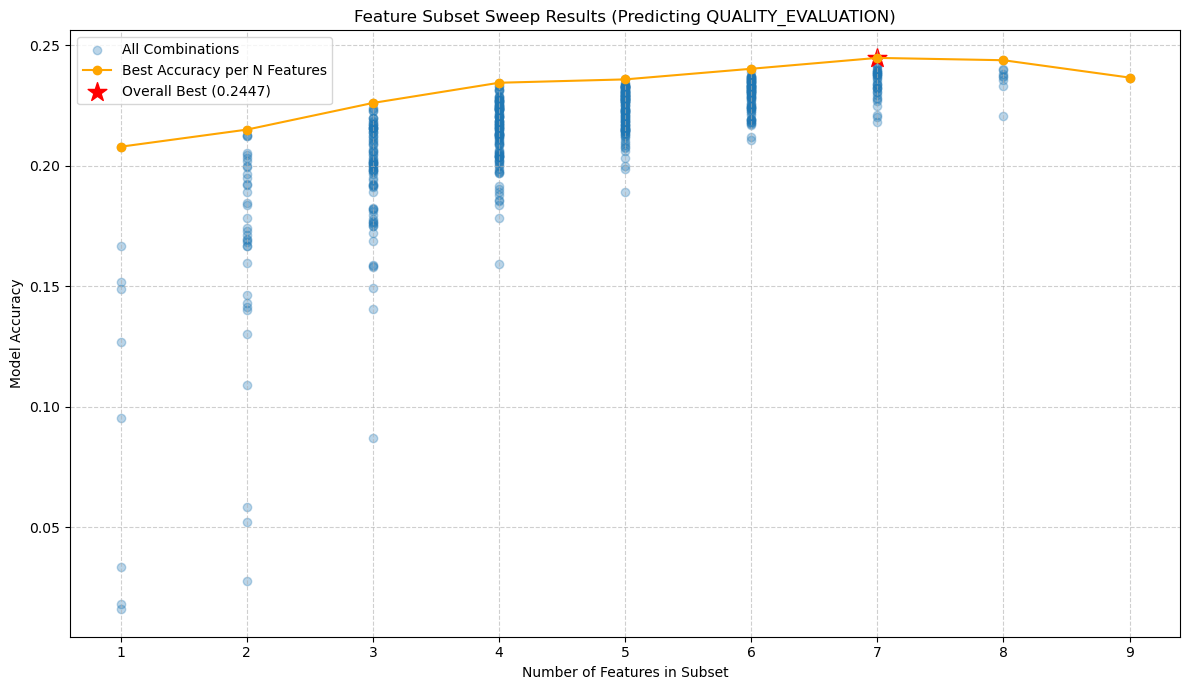


Best Performing Feature Subset:
  Features: ('TASK_ID', 'FORECAST', '_work_ready', '_time_taken', '_time_reception', '_time_to_close', 'TASK_TYPE')
  Number of Features: 7
  Accuracy: 0.2447


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools
import matplotlib.pyplot as plt
import time # To estimate time
from tqdm import tqdm

# --- Function 1: Run model for a specific feature subset ---
def run_model_with_features(X, y, features_subset, model_class=RandomForestClassifier, random_state=42, test_size=0.3, model_params=None):
    """
    Trains and evaluates a model using a specific subset of features.

    Args:
        X (pd.DataFrame): Full feature DataFrame.
        y (pd.Series): Target variable Series.
        features_subset (list or tuple): List of feature names to use.
        model_class: The scikit-learn classifier class to use.
        random_state (int): Random state for train_test_split and model.
        test_size (float): Proportion of data for the test set.
        model_params (dict, optional): Parameters for the model initializer. Defaults to None.

    Returns:
        float: Accuracy score on the test set.
    """
    if not features_subset:
        return 0.0 # No features, accuracy is 0 or undefined

    X_subset = X[list(features_subset)]

    X_train, X_test, y_train, y_test = train_test_split(
        X_subset, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )

    if model_params is None:
        model_params = {'random_state': random_state, 'class_weight': 'balanced', 'n_estimators': 50} # Using fewer estimators for speed

    # Ensure random_state is passed if supported
    try:
        model = model_class(**model_params)
    except TypeError:
         # Handle models that don't accept random_state directly in constructor or other params
         print(f"Warning: Adjusting model params for {model_class.__name__}")
         valid_params = model_class().get_params().keys()
         filtered_params = {k: v for k, v in model_params.items() if k in valid_params}
         model = model_class(**filtered_params)
         # Set random_state separately if possible
         if hasattr(model, 'random_state'):
             model.random_state = random_state


    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# --- Function 2: Feature Sweeper ---
def sweep_features(X, y, max_features=None, model_class=RandomForestClassifier, random_state=42, test_size=0.3, model_params=None):
    all_features = list(X.columns)
    n_features = len(all_features)
    results = []
    total_combinations = 0
    limit = max_features if max_features is not None else n_features

    print(f"Starting feature sweep. Total features: {n_features}. Max subset size: {limit}")

    # Calculate total combinations for progress estimation
    for r in range(1, limit + 1):
        total_combinations += len(list(itertools.combinations(all_features, r)))
    print(f"Total combinations to test: {total_combinations}")

    count = 0
    start_time = time.time()

    for r in tqdm(range(1, limit + 1)): # Iterate through subset sizes (1 to n)
        feature_combinations = itertools.combinations(all_features, r)

        for subset in tqdm(feature_combinations):
            count += 1
            accuracy = run_model_with_features(
                X, y, subset, model_class, random_state, test_size, model_params
            )
            results.append({
                'features': subset,
                'num_features': len(subset),
                'accuracy': accuracy
            })

            if count % 100 == 0 or count == total_combinations: # Print progress
                 elapsed = time.time() - start_time
                 avg_time = elapsed / count if count else 0
                 est_remaining = avg_time * (total_combinations - count)
                 print(f"  Tested {count}/{total_combinations} combinations. Last accuracy: {accuracy:.4f}. Est. time remaining: {est_remaining:.2f}s")


    print(f"\nFeature sweep completed in {time.time() - start_time:.2f} seconds.")
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by='accuracy', ascending=False).reset_index(drop=True)
    return results_df

# --- Function 3: Plotting Results ---
def plot_feature_sweep_results(results_df):
    """Plots the accuracy vs. number of features."""
    if results_df.empty:
        print("No results to plot.")
        return

    # Find best accuracy for each number of features
    best_per_n = results_df.loc[results_df.groupby('num_features')['accuracy'].idxmax()]
    best_overall = results_df.iloc[0] # Top row after sorting

    plt.figure(figsize=(12, 7))

    # Plot all results slightly transparent
    plt.scatter(results_df['num_features'], results_df['accuracy'], alpha=0.3, label='All Combinations')

    # Plot best result for each 'n' features
    plt.plot(best_per_n['num_features'], best_per_n['accuracy'], marker='o', color='orange', linestyle='-', label='Best Accuracy per N Features')

    # Highlight the overall best point
    plt.scatter(best_overall['num_features'], best_overall['accuracy'], marker='*', color='red', s=200, label=f"Overall Best ({best_overall['accuracy']:.4f})")

    plt.xlabel("Number of Features in Subset")
    plt.ylabel("Model Accuracy")
    plt.title("Feature Subset Sweep Results (Predicting QUALITY_EVALUATION)")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.xticks(range(1, results_df['num_features'].max() + 1)) # Ensure integer ticks
    plt.tight_layout()
    plt.show()

    print("\nBest Performing Feature Subset:")
    print(f"  Features: {best_overall['features']}")
    print(f"  Number of Features: {best_overall['num_features']}")
    print(f"  Accuracy: {best_overall['accuracy']:.4f}")


# --- Example Usage ---
# Ensure X and y are correctly prepared before this point!
if 'X' in locals() and 'y' in locals() and not X.empty:
    # Optional: limit max_features if computation takes too long
    # sweep_results = sweep_features(X, y, max_features=10) 
    sweep_results = sweep_features(X, y) 

    print("\nTop 5 Feature Combinations:")
    print(sweep_results.head())

    plot_feature_sweep_results(sweep_results)
else:
    print("Please ensure variables 'X' and 'y' are prepared from the previous step.")

In [73]:
import dill
dill.dump_session('session.db')

/home/tomiock/uni2024/sys_project/.venv/lib/python3.12/site-packages/dill/_dill.py:422: PicklingWarning: Cannot locate reference to <class '__main__.__DW_OUTPUT_FORMATTER__.<locals>.DataWranglerFormatter'>.
  StockPickler.save(self, obj, save_persistent_id)
/home/tomiock/uni2024/sys_project/.venv/lib/python3.12/site-packages/dill/_dill.py:422: PicklingWarning: Cannot pickle <class '__main__.__DW_OUTPUT_FORMATTER__.<locals>.DataWranglerFormatter'>: __main__.__DW_OUTPUT_FORMATTER__.<locals>.DataWranglerFormatter has recursive self-references that trigger a RecursionError.
  StockPickler.save(self, obj, save_persistent_id)


PicklingError: Can't pickle <class '__main__.__DW_OUTPUT_FORMATTER__.<locals>.DataWranglerFormatter'>: it's not found as __main__.__DW_OUTPUT_FORMATTER__.<locals>.DataWranglerFormatter

In [76]:
# try a SVM

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the SVM model
svm = SVC(random_state=42, class_weight='balanced')
# Create a pipeline with scaling and SVM
pipeline = make_pipeline(StandardScaler(), svm)
# Define the parameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)


/home/tomiock/uni2024/sys_project/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 